# <img style="float: left; padding-right: 10px; width: 200px" src="https://fligoo.com/img/logo-large.png"> Fligoo - Credit Risk

Tech Interview for Data Scientist

<hr style="height:2pt">

## Motivation

Credit risk is most simply defined as the potential that a bank borrower or counterparty will fail to meet its obligations in accordance with agreed terms. The goal of credit risk management is to maximise a bank's risk-adjusted rate of return by maintaining credit risk exposure within acceptable parameters. Banks need to manage the credit risk inherent in the entire portfolio as well as the risk in individual credits or transactions. 

## Description

The following dataset has 150.000 records of borrowers taken from an anonymous bank, which are described through 12 different columns.

The goal of this test is to perform an Exploratory Data Analysis (EDA) on this dataset, to understand the information contained and obtain insights that could be relevant to solve a business problem and develop a simple model that could predict the risk.

You can find the data in this [link](https://s3-us-west-2.amazonaws.com/fligoo.data-science/TechInterviews/CreditEDA/data/credit-data.csv)

Below is a description of the involved columns:

| Variable Name | Description | 
| ------------- | ----------- |
| unnamed:0 | ID of borrower |
| serious_dlqin2yrs | Person experienced 90 days past due delinquency or worse |
| revolving_utilization_of_unsecured_lines | Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits |
| age | Age of borrower in years | 
| number_of_time30-59_days_past_due_not_worse | Number of times borrower has been 30-59 days past due but no worse in the last 2 years |
| debt_ratio | Monthly debt payments, alimony, living costs divided by monthy gross income |
| monthly_income | Monthly income |
| number_of_open_credit_lines_and_loans | Number of open loans (installment like car loan or mortgage) and lines of credit (e.g. credit cards) |
| number_of_times90_days_late | Number of times borrower has been 90 days or more past due |
| number_real_estate_loans_or_lines | Number of mortgage and real estate loans including home equity lines of credit |
| number_of_time60-89_days_past_due_not_worse | Number of times borrower has been 60-89 days past due but no worse in the last 2 years |
| number_of_dependents | Number of dependents in family excluding themselves (spouse, children etc.) |


Please **read carefully** all the assignments to guide the work that is expected to find in this notebook.

## Goal

In this notebook you have to load all the libraries you need to explore and process the given dataset, and then perform the analysis to extract meaningful facts in order to understand the information involved. You are free to make any kind of analytic you want, but at the end it is expected to have done the assignments on this notebook. In addition, there are some "nice to have" aspects that would enrich the work done.

> Please provide reports in English and focus on findings and insights

**Stack of technologies:** 
The analysis on this notebook should be done by using one of the following stacks: 
- Python 3.x (not 2.x) & Pandas 1.0.x
- R & Tidyverse & Tidymodels

### Assignment

- **Report insights and conclusions:** Describe the results obtained during the exploratory analysis and provide conclusions from a business perspective, supported by charts / tables / metrics. 
- **Data Quality Check:** You must check the quality of the given dataset to make an assessment of how appropriate it is for later Data Science tasks. Propose a set of corrective actions over the data.     
   
- **Feature extraction:** Indicate some possible candidates of features that could properly describe the borrowers, either from the given columns or from their transformations.
- **Machine Learning modeling:** at least one fitted model with the given data. You could use the `serious_dlqin2yrs` column as target.


### Nice to have aspects

- Dockerfile to setup environment.
- Identify features and new attributes / tables that could be relevant or needed for better analysis
- **Code versioning with Git** (you are free to publish it on your own Github/Bitbucket account!).
- **Show proficiency in Python:** By showing good practices in the structure and documentation, usage of several programming paradigms (e.g. imperative, OOP, functional), etc.
- **Use cases:** Describe possible use cases for this dataset that could add value to the given business, indicating methods / techniques and algorithms for each of them and justifying the choice made.
- **Machine Learning approaches:** Describe the possible Machine Learning tasks that could be performed from the given data, which may be valuable in the context of the finance domain (just explain with words, don't fit a model).

Once you complete the assessment, please send a ZIP file of the folder with all the resources used in this work (e.g. Jupyter notebook, Python scripts, text files, images, etc) to esteban.delboca@fligoo.com. Then you are going to have a final meeting with the team to discuss the work done in this notebook and answer the questions that could arise.

**Have fun!**

![Have fun](https://media1.tenor.com/images/8d13f337a8c6e5aab8ba1bd8acd4da0c/tenor.gif?itemid=5304821)

## EDA Analysis

### Reading dataset

Importing the libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

import warnings
warnings.filterwarnings('ignore')

Read and inspect the dataset

In [2]:
data=pd.read_csv('credit-data.csv', index_col=0)

In [3]:
data.head()

,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents
unnamed: 0,,,,,,,,,,,
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   serious_dlqin2yrs                            150000 non-null  int64  
 1   revolving_utilization_of_unsecured_lines     150000 non-null  float64
 2   age                                          150000 non-null  int64  
 3   number_of_time30-59_days_past_due_not_worse  150000 non-null  int64  
 4   debt_ratio                                   150000 non-null  float64
 5   monthly_income                               120269 non-null  float64
 6   number_of_open_credit_lines_and_loans        150000 non-null  int64  
 7   number_of_times90_days_late                  150000 non-null  int64  
 8   number_real_estate_loans_or_lines            150000 non-null  int64  
 9   number_of_time60-89_days_past_due_not_worse  150000 non-nul

In [5]:
data.describe()

,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.737413
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.107021
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f84708d1780>,
      dtype=object)

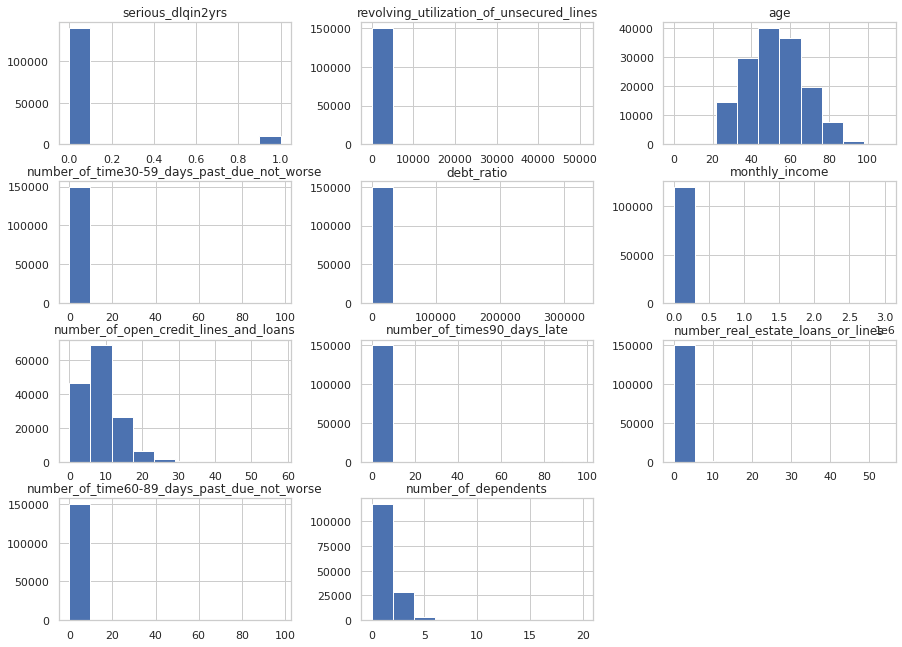

In [6]:
data.hist(figsize=[15,11])

### Removing outliers

We can assume there are outliers in our data due to  the features shape shown in the previous graph and the description of the percentiles. Consequently, we will look into more detail each feature.



In [7]:
#declaring a method to draw a histogram
def graph_variable(col_list):
  sns.set(style="whitegrid")
  x = col_list
  f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(13,5))
  sns.boxplot(x, ax=ax_box) 
  if len(x.value_counts()) > 20:
    sns.distplot(x, ax=ax_hist, kde=False)
  else:
    sns.countplot(x, ax=ax_hist)
  
  sns.despine(ax=ax_hist)
  sns.despine(ax=ax_box, left=True)


The following features have the same maximum value: 


*   number_of_time30-59_days_past_due_not_worse
*   number_of_times90_days_late
*   number_of_time60-89_days_past_due_not_worse 

We observed that 98 are 96 are extreme values for these features as it is unlikely that borrowers have that number of delays.

I assume this is an error of data collection. As the amount of error is not big, I choose removing those observations.

In [8]:
data['number_of_time30-59_days_past_due_not_worse'].value_counts()

0     126018
1      16033
2       4598
3       1754
4        747
5        342
98       264
6        140
7         54
8         25
9         12
96         5
10         4
12         2
13         1
11         1
Name: number_of_time30-59_days_past_due_not_worse, dtype: int64

In [9]:
data['number_of_time60-89_days_past_due_not_worse'].value_counts()

0     142396
1       5731
2       1118
3        318
98       264
4        105
5         34
6         16
7          9
96         5
8          2
11         1
9          1
Name: number_of_time60-89_days_past_due_not_worse, dtype: int64

In [10]:
data['number_of_times90_days_late'].value_counts()

0     141662
1       5243
2       1555
3        667
4        291
98       264
5        131
6         80
7         38
8         21
9         19
10         8
11         5
96         5
13         4
12         2
14         2
15         2
17         1
Name: number_of_times90_days_late, dtype: int64

In [11]:
data=data.drop(data[data['number_of_times90_days_late']==98].index)
data=data.drop(data[data['number_of_times90_days_late']==96].index)
print('After removing outliers we have: ',len(data), 'observations')

After removing outliers we have:  149731 observations


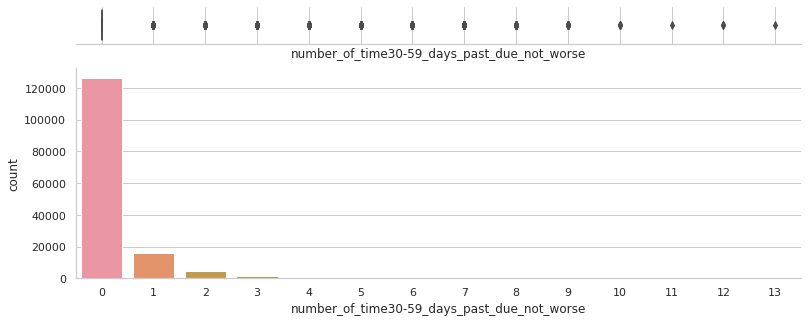

In [12]:
graph_variable(data['number_of_time30-59_days_past_due_not_worse'])

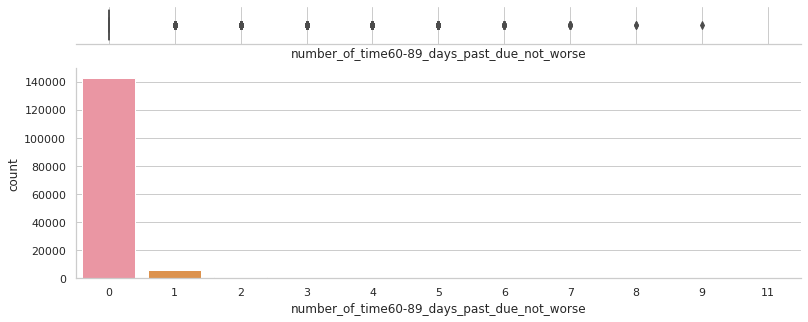

In [13]:
graph_variable(data['number_of_time60-89_days_past_due_not_worse'])

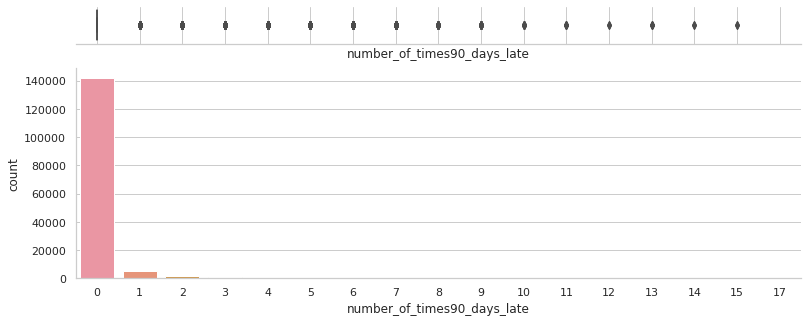

In [14]:
graph_variable(data['number_of_times90_days_late'])

As we can observe, the distribution is still right skewed. In order to get meaningful insights for these parameters, I decided to merge all the values higher than 2. Consequently, the value 2 will represent 2 or more. 

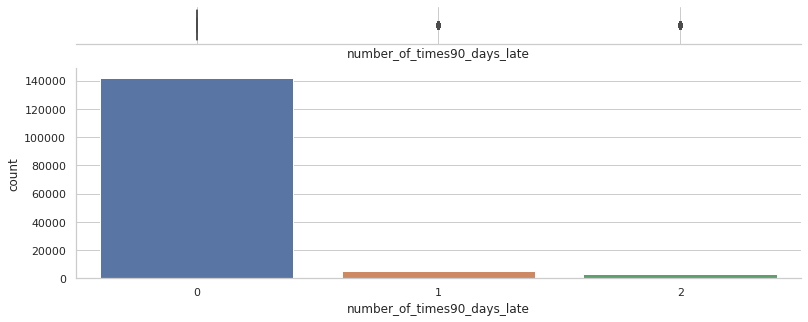

In [15]:
data['number_of_times90_days_late'] = data['number_of_times90_days_late'].apply(lambda x: 2 if x> 2 else x)
data['number_of_time60-89_days_past_due_not_worse'] = data['number_of_time60-89_days_past_due_not_worse'].apply(lambda x: 2 if x> 2 else x)
data['number_of_time30-59_days_past_due_not_worse'] = data['number_of_time30-59_days_past_due_not_worse'].apply(lambda x: 2 if x> 2 else x)

graph_variable(data['number_of_times90_days_late'])

Monthly income

After looking at the shape of the distribution, I decided to drop all observations above 99th percentile.

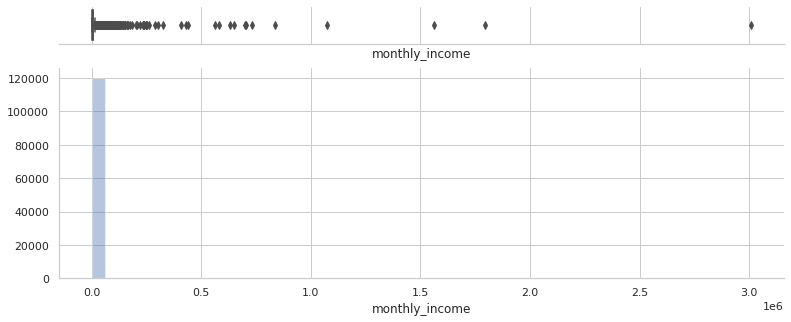

In [16]:
graph_variable(data['monthly_income'])

In [17]:
print('Inspecting percentiles')
print('95th: ',data.monthly_income.quantile(0.95))
print('99th: ',data.monthly_income.quantile(0.99))

Inspecting percentiles
95th:  14600.0
99th:  25000.0


In [18]:
data=data.drop(data[data["monthly_income"] > data.monthly_income.quantile(0.99)].index)
print('After removing outliers we have: ',len(data), 'observations')

After removing outliers we have:  148564 observations


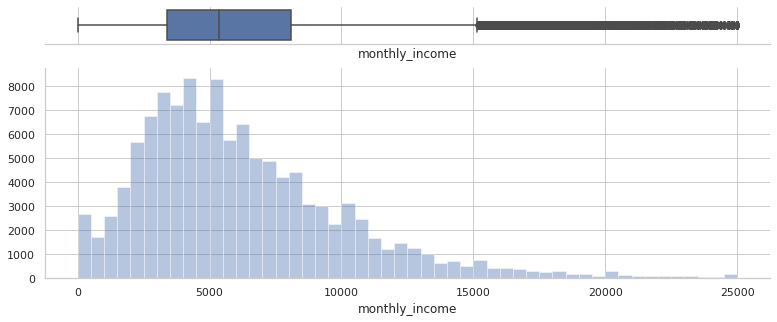

In [19]:
graph_variable(data['monthly_income'])

Debt ratio

I checked the shape of the distributios and the percentiles

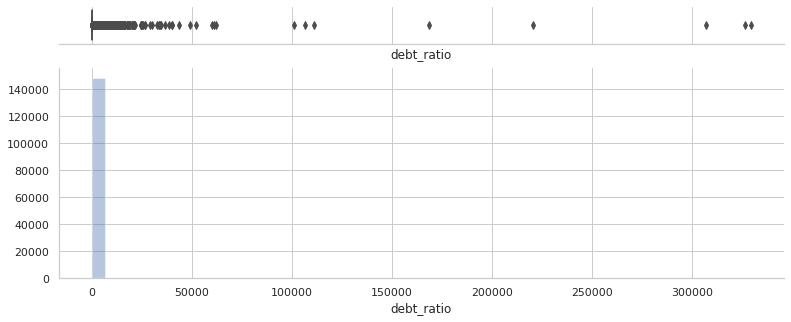

In [20]:
graph_variable(data['debt_ratio'])

In [21]:
print('Inspecting percentiles')
print('75th: ',data.debt_ratio.quantile(0.75))
print('80th: ',data.debt_ratio.quantile(0.80))
print('90th: ',data.debt_ratio.quantile(0.90))
print('95th: ',data.debt_ratio.quantile(0.95))

Inspecting percentiles
75th:  0.88461403525
80th:  5.0
90th:  1286.0
95th:  2463.0



It seems to be some wrong data. So, I checked some statistics


In [22]:
data_high_debt_ratio=data[data['debt_ratio']>10]
hdr_mv=len(data_high_debt_ratio[data_high_debt_ratio['monthly_income'].isna()])/len(data_high_debt_ratio)
print("{:.1%} of observations with high debt ratio also have missing values in the monthly income feature".format(hdr_mv))

92.7% of observations with high debt ratio also have missing values in the monthly income feature


In [23]:
data_null_income=data[data['monthly_income'].isna()]
len(data_null_income[data_null_income['debt_ratio']>10])/len(data_null_income)
print("{:.1%} of observations with high debt ratio also have missing values in the monthly income feature".format(hdr_mv))

92.7% of observations with high debt ratio also have missing values in the monthly income feature


Without accurate information about the monthly income we cannot have an accurate calculation of the debt ratio. Which can explain why the ratios are so big for the observations with missing  income values. 

For this parameter, I set null values when the monthly income is null and the ratio is greater than 10. In the next session I will impute new values for the missing ones.

In [24]:
for index, row in data.iterrows():
  if pd.isna(row['monthly_income']) and row['debt_ratio']>10:
    data.loc[index, 'debt_ratio']=None

In [25]:
data=data.drop(data[data["debt_ratio"] > data.debt_ratio.quantile(0.98)].index)
print('After removing outliers we have: ',len(data), 'observations')

After removing outliers we have:  146186 observations


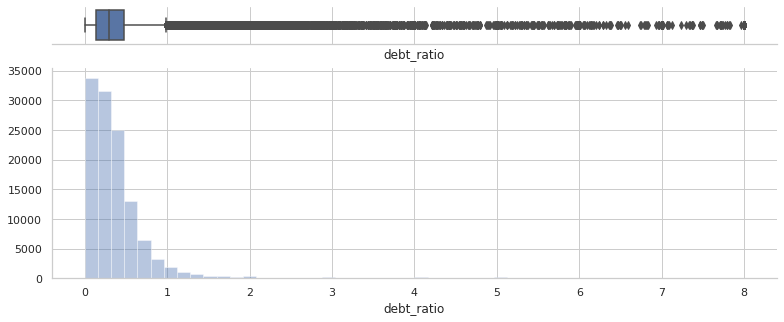

In [26]:
graph_variable(data['debt_ratio'])

Revolving utilization of unsecured lines

After looking at the shape of the distribution, I decided to drop all observations above 99th percentile.

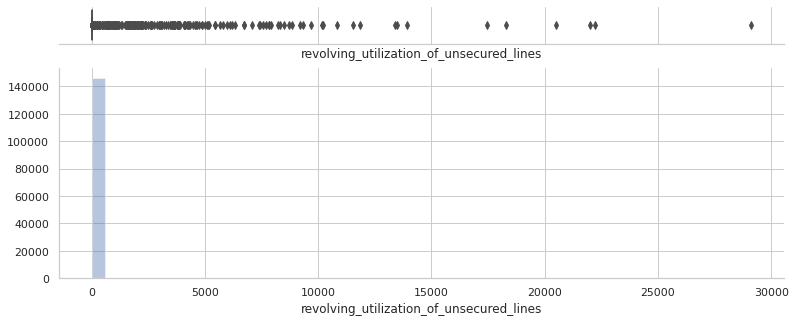

In [27]:
graph_variable(data['revolving_utilization_of_unsecured_lines'])

In [28]:
print('Inspecting percentiles')
print('75th: ',data.revolving_utilization_of_unsecured_lines.quantile(0.75))
print('90th: ',data.revolving_utilization_of_unsecured_lines.quantile(0.90))
print('99th: ',data.revolving_utilization_of_unsecured_lines.quantile(0.99))

Inspecting percentiles
75th:  0.55784774
90th:  0.9785366555
99th:  1.0938486213999996


In [29]:
data=data.drop(data[data["revolving_utilization_of_unsecured_lines"] > data.revolving_utilization_of_unsecured_lines.quantile(0.99)].index)
print('After removing outliers we have: ',len(data), 'observations')

After removing outliers we have:  144724 observations


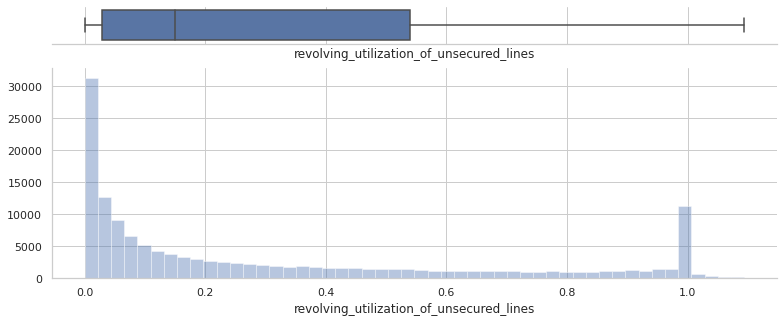

In [30]:
graph_variable(data['revolving_utilization_of_unsecured_lines'])

Number of real estate loans or lines

After looking at the shape of the distribution, I decided to drop all observations above 99th percentile.

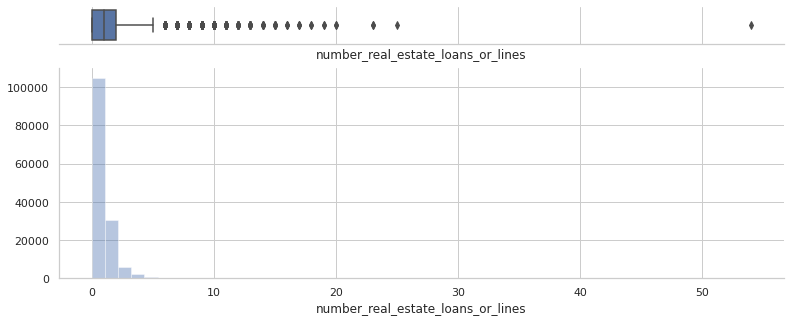

In [31]:
graph_variable(data['number_real_estate_loans_or_lines'])

In [32]:
print('Inspecting percentiles')
print('75th: ',data.number_real_estate_loans_or_lines.quantile(0.75))
print('90th: ',data.number_real_estate_loans_or_lines.quantile(0.90))
print('995th: ',data.number_real_estate_loans_or_lines.quantile(0.995))

Inspecting percentiles
75th:  2.0
90th:  2.0
995th:  5.0


In [33]:
data=data.drop(data[data["number_real_estate_loans_or_lines"] > data.number_real_estate_loans_or_lines.quantile(0.995)].index)
print('After removing outliers we have: ',len(data), 'observations')

After removing outliers we have:  144004 observations


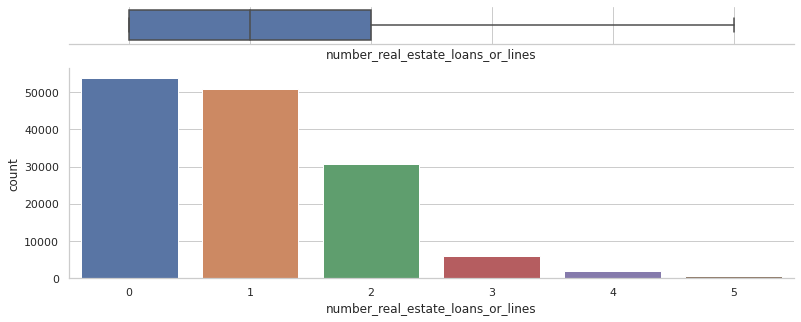

In [34]:
graph_variable(data['number_real_estate_loans_or_lines'])

Number of dependents

The same way I did for the number of delays, I decided to merge all the values higher than 4. Consequently, the value 4 will represent 4 or more. 

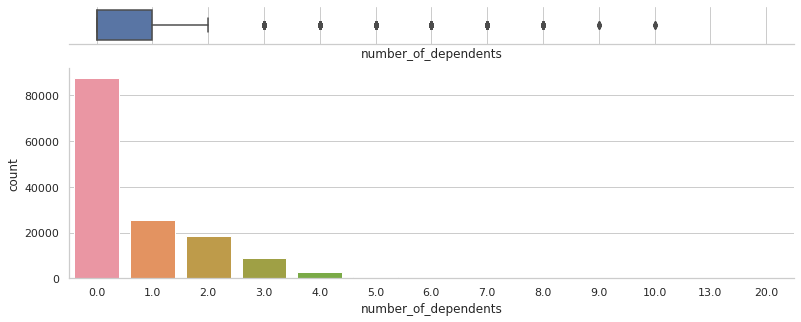

In [35]:
graph_variable(data['number_of_dependents'])

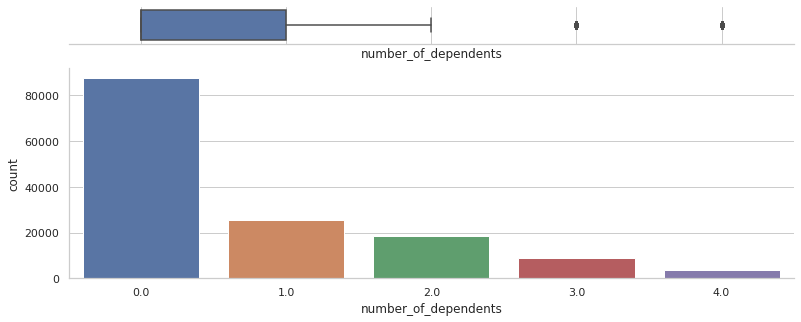

In [36]:
data['number_of_dependents'] = data['number_of_dependents'].apply(lambda x: 4 if x> 4 else x)
graph_variable(data['number_of_dependents'])

Number of open credit lines and loans

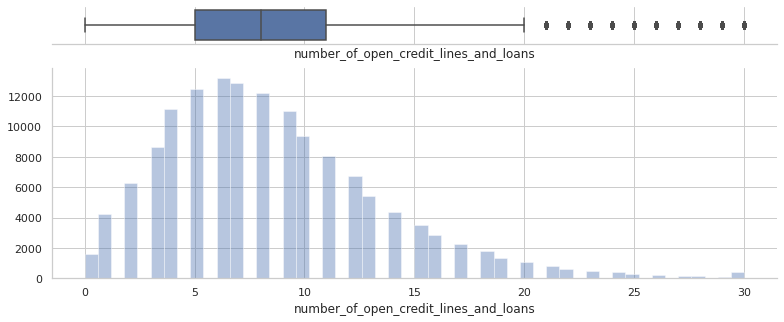

In [37]:
data['number_of_open_credit_lines_and_loans'] = data['number_of_open_credit_lines_and_loans'].apply(lambda x: 30 if x> 30 else x)
graph_variable(data['number_of_open_credit_lines_and_loans'])

### Null values

In [38]:
data.isna().sum()

serious_dlqin2yrs                                  0
revolving_utilization_of_unsecured_lines           0
age                                                0
number_of_time30-59_days_past_due_not_worse        0
debt_ratio                                     26319
monthly_income                                 28957
number_of_open_credit_lines_and_loans              0
number_of_times90_days_late                        0
number_real_estate_loans_or_lines                  0
number_of_time60-89_days_past_due_not_worse        0
number_of_dependents                               0
dtype: int64

In [39]:
data.isna().sum()/len(data)

serious_dlqin2yrs                              0.000000
revolving_utilization_of_unsecured_lines       0.000000
age                                            0.000000
number_of_time30-59_days_past_due_not_worse    0.000000
debt_ratio                                     0.182766
monthly_income                                 0.201085
number_of_open_credit_lines_and_loans          0.000000
number_of_times90_days_late                    0.000000
number_real_estate_loans_or_lines              0.000000
number_of_time60-89_days_past_due_not_worse    0.000000
number_of_dependents                           0.000000
dtype: float64

I will imputate the missing values for monthly income and debt ratio with a function which sample from a normal distribution. I calculated 2 different means and standart deviations depending on the serious_dlqin2yrs value.

In [40]:
# Monthly INCOME
med_dl=data[data['serious_dlqin2yrs']==1]['monthly_income'].median()
med_ndl= data[data['serious_dlqin2yrs']==0]['monthly_income'].median()
sd_dl=np.std(data[data['serious_dlqin2yrs']==1]['monthly_income'])
sd_ndl=np.std(data[data['serious_dlqin2yrs']==0]['monthly_income'])

print('People who had past due delinquency. MEDIAN: ', med_dl , 'STANDAR DEVIATION: {:.2f}'.format(sd_dl) )
print('People who had not past due delinquency. MEDIAN: ', med_ndl , 'STANDAR DEVIATION:: {:.2f}'.format(sd_ndl) )

People who had past due delinquency. MEDIAN:  4506.0 STANDAR DEVIATION: 3477.17
People who had not past due delinquency. MEDIAN:  5500.0 STANDAR DEVIATION:: 3905.56


In [41]:
# debt ratio
med_dl_inc=data[data['serious_dlqin2yrs']==1]['debt_ratio'].median()
med_ndl_inc= data[data['serious_dlqin2yrs']==0]['debt_ratio'].median()
sd_dl_inc=np.std(data[data['serious_dlqin2yrs']==1]['debt_ratio'])
sd_ndl_inc=np.std(data[data['serious_dlqin2yrs']==0]['debt_ratio'])

print('People who had past due delinquency. MEDIAN: ', med_dl_inc , 'STANDAR DEVIATION: {:.2f}'.format(sd_dl_inc) )
print('People who had not past due delinquency. MEDIAN: ', med_ndl_inc , 'STANDAR DEVIATION:: {:.2f}'.format(sd_ndl_inc) )

People who had past due delinquency. MEDIAN:  0.359176055 STANDAR DEVIATION: 0.54
People who had not past due delinquency. MEDIAN:  0.2874953305 STANDAR DEVIATION:: 0.60


In [42]:
def fill_na_normal(mean, sd):
  return abs(np.round(np.random.normal(mean, sd, 1)[0], 2))

In [43]:
for index, row in data.iterrows():
  if pd.isna(row['monthly_income']):
    if row['serious_dlqin2yrs']==1:
      data.loc[index, 'monthly_income']=fill_na_normal(med_dl, sd_dl)
    else:
      data.loc[index, 'monthly_income']=fill_na_normal(med_ndl, sd_ndl)
  
  if pd.isna(row['debt_ratio']):
    if row['serious_dlqin2yrs']==1:
      data.loc[index, 'debt_ratio']=fill_na_normal(med_dl_inc, sd_dl_inc)
    else:
      data.loc[index, 'debt_ratio']=fill_na_normal(med_dl_inc, sd_dl_inc)

### Correlation

The correlation matrix shows the dependencies between variables.

We notice that:

As we can expect, the number of loans and credits is correlated with the number of mortgage and real estate loans because one includes the other.

Having experienced 90 days past due delinquency is related with the revolving utilization of unsecured lines, and the number of past due between 30-60, 60-90 or more than 90. Moreover, it is also related with the age of the borrower.


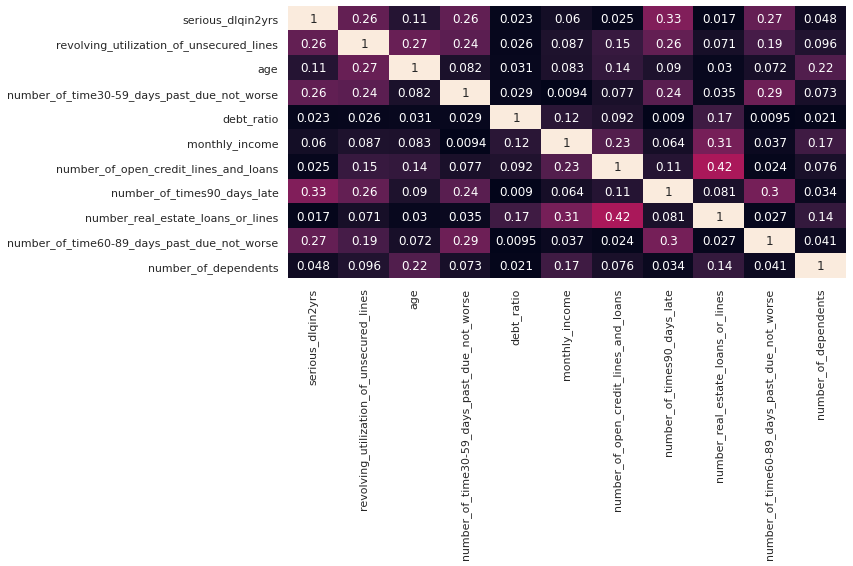

In [44]:
fig=plt.figure(figsize=(10, 5))
sns.heatmap(abs(data.corr()), annot=True,  cbar=False)

### Metrics and suggestions

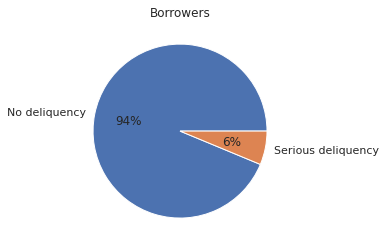

In [47]:
fig=plt.pie(data['serious_dlqin2yrs'].value_counts(), labels=['No deliquency', 'Serious deliquency'], autopct='%1.f%%')
fig=plt.title('Borrowers')

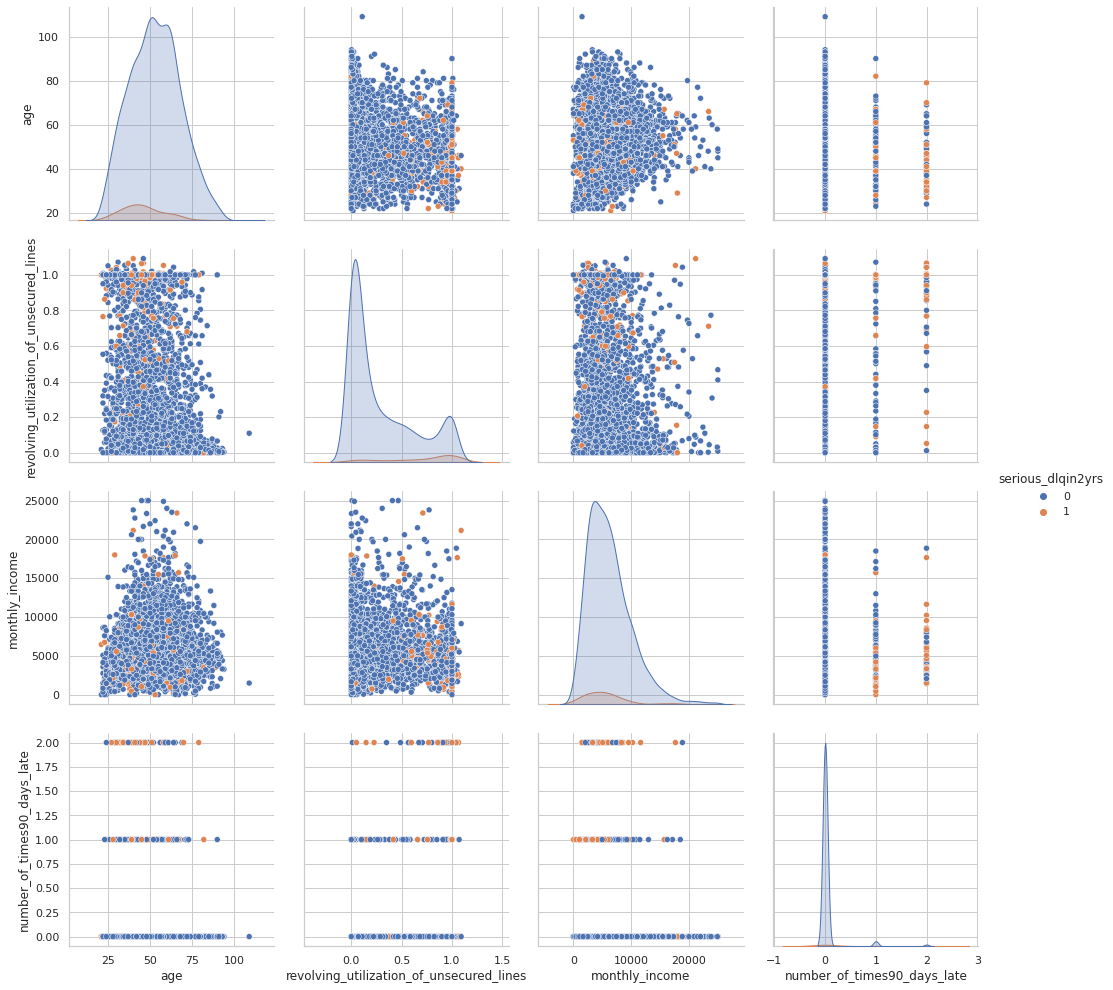

In [66]:
sns.pairplot(data.loc[:,['serious_dlqin2yrs', 'age','revolving_utilization_of_unsecured_lines', 'monthly_income', 'number_of_times90_days_late']].sample(frac=0.02),
             hue="serious_dlqin2yrs",
             height=3.5
             )

In [ ]:
data_risk=data[data['serious_dlqin2yrs']==1]

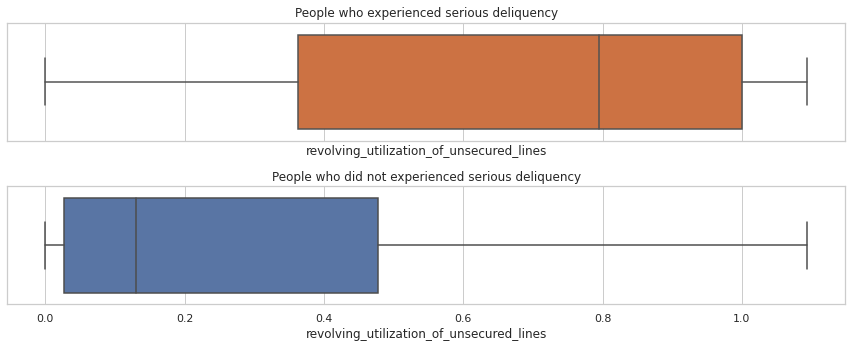

In [84]:
f, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.50, .50)}, figsize=(12,5))
sns.boxplot(data[data['serious_dlqin2yrs']==1]['revolving_utilization_of_unsecured_lines'], ax=ax1, color='#e36b2c')
sns.boxplot(data[data['serious_dlqin2yrs']==0]['revolving_utilization_of_unsecured_lines'], ax=ax2)

ax1.title.set_text('People who experienced serious deliquency')
ax2.title.set_text('People who did not experienced serious deliquency')
f.tight_layout()

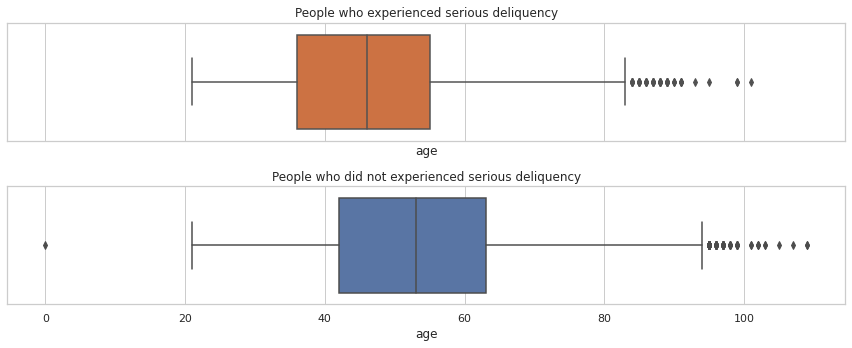

In [85]:
f, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.50, .50)}, figsize=(12,5))
sns.boxplot(data[data['serious_dlqin2yrs']==1]['age'], ax=ax1, color='#e36b2c')
sns.boxplot(data[data['serious_dlqin2yrs']==0]['age'], ax=ax2)

ax1.title.set_text('People who experienced serious deliquency')
ax2.title.set_text('People who did not experienced serious deliquency')
f.tight_layout()

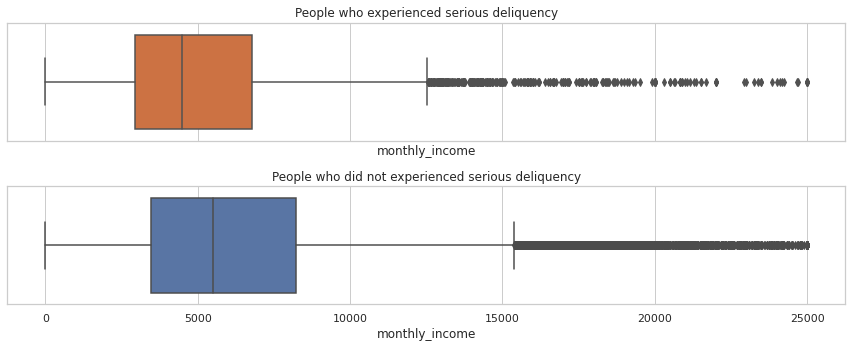

In [87]:
f, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.50, .50)}, figsize=(12,5))
sns.boxplot(data[data['serious_dlqin2yrs']==1]['monthly_income'], ax=ax1, color='#e36b2c')
sns.boxplot(data[data['serious_dlqin2yrs']==0]['monthly_income'], ax=ax2)

ax1.title.set_text('People who experienced serious deliquency')
ax2.title.set_text('People who did not experienced serious deliquency')
f.tight_layout()

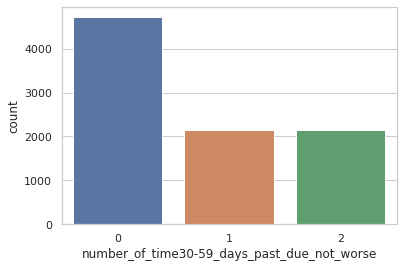

In [97]:
sns.countplot(data[data['serious_dlqin2yrs']==1]['number_of_time30-59_days_past_due_not_worse'])

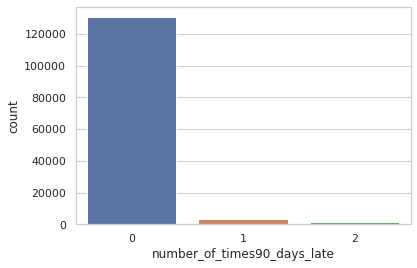

In [99]:
sns.countplot(data[data['serious_dlqin2yrs']==0]['number_of_times90_days_late'])

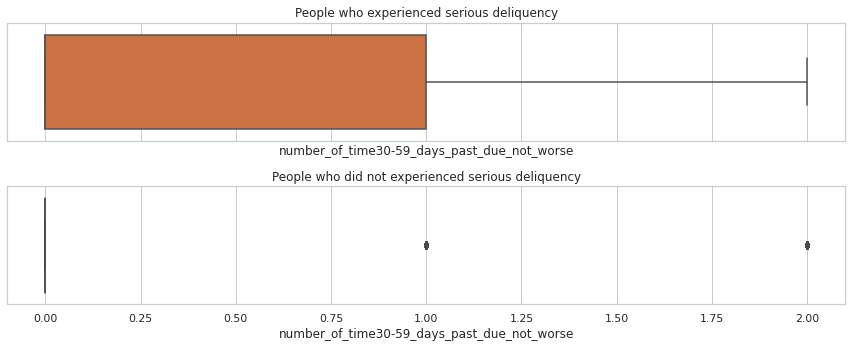

In [94]:
f, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.50, .50)}, figsize=(12,5))
sns.boxplot(data[data['serious_dlqin2yrs']==1]['number_of_time30-59_days_past_due_not_worse'], ax=ax1, color='#e36b2c')

sns.boxplot(data[data['serious_dlqin2yrs']==0]['number_of_time30-59_days_past_due_not_worse'], ax=ax2)

ax1.title.set_text('People who experienced serious deliquency')
ax2.title.set_text('People who did not experienced serious deliquency')
f.tight_layout()

## Risk predicction

Separate Train and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,1:], data.iloc[:,0], test_size=0.20, random_state=42)
print('Trainig set:', len(X_train))
print('Test set:', len(X_test))

Trainig set: 115203
Test set: 28801


Scale the data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

norm_x_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)

norm_x_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)


The dataset is imbalanced, so I will use an oversample technique in order to get a better performance

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(norm_x_train, y_train)

In [ ]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE().fit_resample(norm_x_train, y_train)

In [ ]:
from sklearn.linear_model import LogisticRegression

log_classifier = LogisticRegression(random_state=0).fit(norm_x_train, y_train)


In [ ]:
y_pred=log_classifier.predict(norm_x_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.939540507859734

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[26926,   188],
       [ 1562,   269]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     27114
           1       0.59      0.15      0.24      1831

    accuracy                           0.94     28945
   macro avg       0.77      0.57      0.60     28945
weighted avg       0.92      0.94      0.92     28945



In [ ]:
from sklearn.naive_bayes import GaussianNB
naive_classifier = GaussianNB().fit(norm_x_train, y_train)


In [ ]:
y_pred=naive_classifier.predict(norm_x_test)

In [ ]:
confusion_matrix(y_test, y_pred)

array([[25653,  1461],
       [  990,   841]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95     27114
           1       0.37      0.46      0.41      1831

    accuracy                           0.92     28945
   macro avg       0.66      0.70      0.68     28945
weighted avg       0.93      0.92      0.92     28945



In [ ]:
len(X_train)

115779

In [ ]:
del log_classifier
del naive_classifier

In [ ]:
log_classifier = LogisticRegression(random_state=0).fit(X_resampled, y_resampled)
naive_classifier = GaussianNB().fit(X_resampled, y_resampled)

In [ ]:
y_pred1=log_classifier.predict(X_test)
y_pred2=naive_classifier.predict(X_test)

In [ ]:
y_pred1=log_classifier.predict(norm_x_test)
y_pred2=naive_classifier.predict(norm_x_test)

In [ ]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.98      0.81      0.88     27037
           1       0.20      0.75      0.32      1764

    accuracy                           0.80     28801
   macro avg       0.59      0.78      0.60     28801
weighted avg       0.93      0.80      0.85     28801



In [ ]:
confusion_matrix(y_test, y_pred1)

array([[21787,  5250],
       [  445,  1319]])

In [ ]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94     27037
           1       0.29      0.59      0.39      1764

    accuracy                           0.89     28801
   macro avg       0.63      0.75      0.66     28801
weighted avg       0.93      0.89      0.90     28801



In [ ]:
confusion_matrix(y_test, y_pred2)

array([[24472,  2565],
       [  721,  1043]])

In [ ]:
X_resampled, y_resampled = SMOTE().fit_resample(norm_x_train, y_train)

In [ ]:
len(norm_x_train)

In [ ]:
len(y_train)

In [ ]:
norm_x_test

In [ ]:
len(X_resampled)